# Капитализация Российского рынка ценных бумаг

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.style.use('seaborn-white')

In [3]:
picts_loc = '/mnt/c/Users/Kostya/Pictures/Screenshots/'
data_loc = '/mnt/c/Users/Kostya/data/'

In [4]:
df = pd.read_csv(data_loc + 'market_cap.csv', sep=';', decimal=',', index_col=0)
df.head()

,name,category,id,volume,price,cap,volume_2012_1,price_2012_1,cap_2012_1,volume_2012_2,...,cap_2020_1,volume_2020_2,price_2020_2,cap_2020_2,volume_2020_3,price_2020_3,cap_2020_3,volume_2020_4,price_2020_4,cap_2020_4
code,,,,,,,,,,,,,,,,,,,,,
ABBN,"АО ""Банк Астаны""",aо,KZ1C00001023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ABRD,"ПАО ""Абрау – Дюрсо""",aо,1-02-12500-A,NaN,NaN,NaN,NaN,NaN,NaN,7.350000e+05,...,1.308302e+10,9.800018e+07,130.000,1.274002e+10,9.800018e+07,194.000,1.901204e+10,9.800018e+07,200.500,1.964904e+10
ACKO,"ПАО ""АСКО-СТРАХОВАНИЕ""",aо,1-01-52065-Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.111840e+09,5.360000e+08,4.980,2.669280e+09,5.360000e+08,5.000,2.680000e+09,5.360000e+08,5.860,3.140960e+09
AESL,"ПАО ""ТПГ АЭССЕЛЬ""",aо,1-01-14863-A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AFKS,"ПАО АФК ""Система""",aо,1-05-01669-A,9.650000e+09,23.307,2.249126e+11,9.650000e+09,26.002,2.509193e+11,9.650000e+09,...,1.243788e+11,9.650000e+09,17.309,1.670318e+11,9.650000e+09,21.202,2.045993e+11,9.650000e+09,28.874,2.786341e+11


In [5]:
sums = []
for col in df.columns:
    if 'cap' in col:
        sums.append(df[col].sum())
sums = pd.Series(sums, name='cap_sum') / 1000000000000
gdp = pd.Series([60.1140008384141, 62.2719776967259, 64.2731509597493, 66.2433553285813, 68.1034496286394, 69.2906761278092, 70.3625623402524, 71.6502437155987, 72.9857011303393, 73.9270918692193,
                75.4633994757446, 77.0039343422155, 79.030040074734, 80.1865592437933, 80.8933848439715, 82.1379700718716, 83.087360054877, 83.504568333275, 84.2057879905226, 84.6523138088193,
                85.6160838014077, 87.3170817789372, 88.7824209071459, 90.2655218343233, 91.8431542184988, 94.1023024639666, 97.4103007045686, 101.201008499582, 104.629637732389, 106.729161649799,
                107.913832038787, 109.280326655954, 110.046051637012, 110.418926126872, 107.296867575758, 106.36278773436, 115.497488286389], name='gdp')

In [6]:
cap_data = pd.DataFrame([sums, gdp]).T.set_index(np.linspace(2011, 2020, len(sums)))
cap_data['gdp_%'] = cap_data['cap_sum'] / cap_data['gdp'] * 100

In [60]:
cap_data.tail()

,cap_sum,gdp,gdp_%
2019.00,48.639603,110.046052,44.199317
2019.25,39.644033,110.418926,35.903295
2019.50,43.671718,107.296868,40.701765
2019.75,45.053488,106.362788,42.358319
2020.00,51.427761,115.497488,44.527168


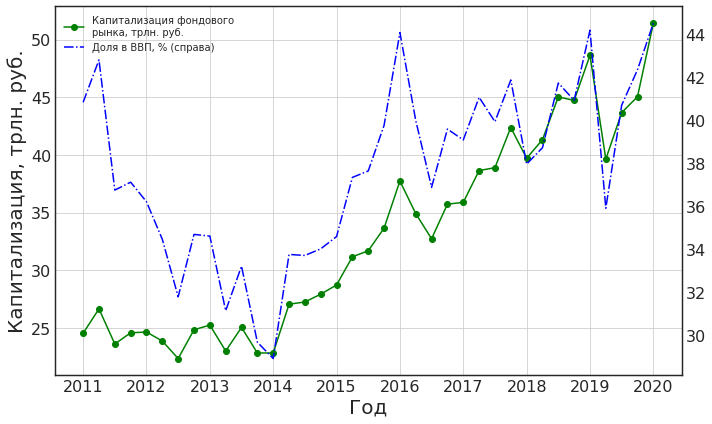

In [8]:
fig, ax = plt.subplots(figsize=(10, 6), tight_layout=True)

cap_data['cap_sum'].plot(label='Капитализация фондового\nрынка, трлн. руб.',
                         legend=True,
                         fontsize=16,
                         marker='o',
                         color='green',
                         ax=ax)
cap_data['gdp_%'].plot(secondary_y=True,
                       label='Доля в ВВП, % (справа)',
                       legend=True,
                       mark_right=False,
                       fontsize=16,
                       linestyle='dashdot',
                       color='blue',
                       ax=ax)
ax.set_xlabel('Год', fontsize=20)
ax.set_ylabel('Капитализация, трлн. руб.', fontsize=20)
ax.grid()
plt.xticks(ticks=cap_data.index[::4])


fig.savefig(picts_loc + 'market_cap.png', dpi=180)

  Капитализация внутреннего рынка акций по итогам 2020 года составила 51,4 трлн. руб. По сравнению с началом 2020 года она увеличилась на 14%. После падения в 2014 г. восстановление рынка заняло 2 года.

In [9]:
df_cap = pd.read_excel(data_loc + 'list-archive-01122020.xlsx', sheet_name=0, header=0, engine='openpyxl')
df_cap[df_cap['Тип ценной бумаги'].isin(['Депозитарные расписки иностранного эмитента на акции',
                                         'Акции иностранного эмитента', 'Акция обыкновенная',
                                         'Российская депозитарная расписка']) & df_cap['ИНН'].notnull()
      ].groupby('Листинг')['ИНН'].count()

Листинг
Второй уровень          22
Первый уровень          55
Первый уровень(РИИ)      1
Третий уровень         145
Третий уровень(РИИ)      5
Name: ИНН, dtype: int64

In [10]:
emitents = pd.DataFrame({'first':  [61, 68, 72, 55, 51, 48, 56],
                         'second': [38, 38, 33, 34, 29, 23, 22],
                         'third':  [159, 156, 148, 153, 155, 154, 150],
                      }, index=[2014, 2015, 2016, 2017, 2018, 2019, 2020])
emitents

,first,second,third
2014,61,38,159
2015,68,38,156
2016,72,33,148
2017,55,34,153
2018,51,29,155
2019,48,23,154
2020,56,22,150


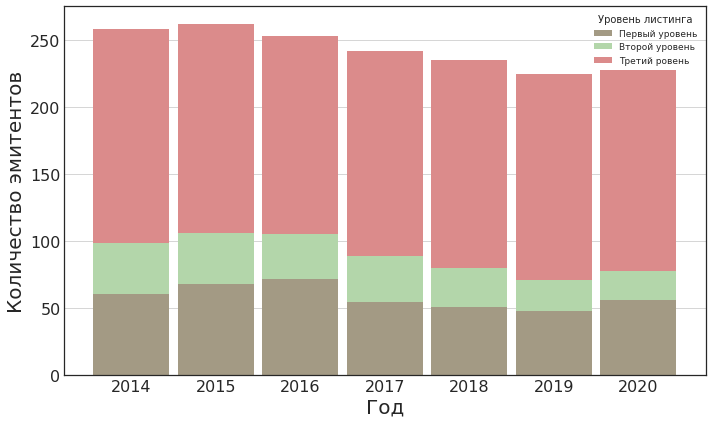

In [11]:
fig, ax = plt.subplots(figsize=(10, 6), tight_layout=True)

plt.bar(emitents.index, emitents['first'], color='#a39a84', label='Первый уровень', width=0.9)
plt.bar(emitents.index, emitents['second'], bottom=emitents['first'], color='#b3d6aa', label='Второй уровень', width=0.9)
plt.bar(emitents.index, emitents['third'], bottom=emitents['second']+emitents['first'], color='#db8b8b', label='Третий ровень', width=0.9)

ax.set_xticks(emitents.index)
ax.legend(title='Уровень листинга', fontsize=9)
ax.set_xlabel('Год', fontsize=20)
ax.set_ylabel('Количество эмитентов', fontsize=20)
ax.grid(axis='y')
plt.tick_params(axis='both', which='major', labelsize=16)

fig.savefig(picts_loc + 'corps_number.png', dpi=180)

  Количество эмитентов акций, торгуемых на Московской бирже, за последние 10 лет уменьшилось почти в 2 раза.

In [12]:
main_cap_weigths = []
counter = 0
for col in df.columns:
    if 'cap' in col:
        weight = df[col].sort_values(ascending=False).head(10).sum() / (sums.values[counter] * 1000000000000) * 100
        main_cap_weigths.append(weight)
        counter += 1

In [13]:
main_cap_weigths[-1]

64.43467839765901

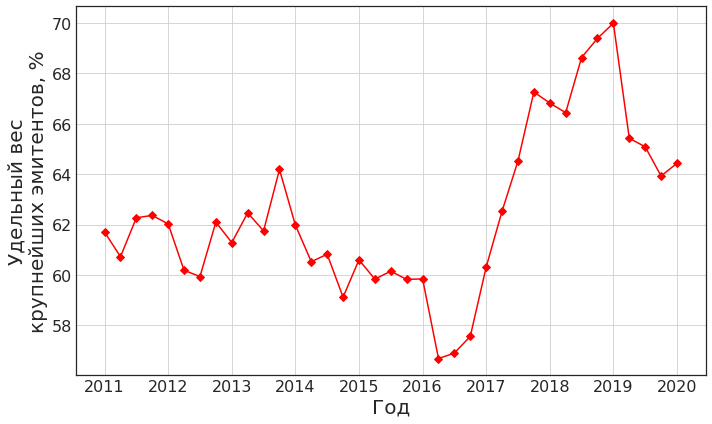

In [14]:
fig, ax = plt.subplots(figsize=(10, 6), tight_layout=True)

plt.plot(cap_data.index, main_cap_weigths, '-D', color='red')
plt.tick_params(axis='both', which='major', labelsize=16)
ax.grid()
plt.xlabel('Год', fontsize=20)
plt.ylabel('Удельный вес\nкрупнейших эмитентов, %', fontsize=20)
plt.xticks(ticks=cap_data.index[::4])

fig.savefig(picts_loc + 'big_weight.png', dpi=180)

  Доля 10 крупнейших компаний в капитализации в 2020 году составила 64,4%.

In [105]:
corps_weigths_2011 = df['cap'].sort_values(ascending=False).head(10) / (sums.values[0] * 1000000000000) * 100
corps_weigths_2011['Остальные'] = 100 - corps_weigths_2011.sum()
labels_2011 = df['name'].loc[corps_weigths_2011.index[:-1]].str.replace('ПАО', '')
labels_2011['Остальные'] = 'Остальные'
labels_2011 = labels_2011.str.replace('"', '')

In [106]:
corps_weigths = df['cap_2020_4'].sort_values(ascending=False).head(10) / (sums.values[-1] * 1000000000000) * 100
corps_weigths['Остальные'] = 100 - corps_weigths.sum()
labels = df['name'].loc[corps_weigths.index[:-1]].str.replace('ПАО', '')
labels['Остальные'] = 'Остальные'
labels = labels.str.replace('"', '')

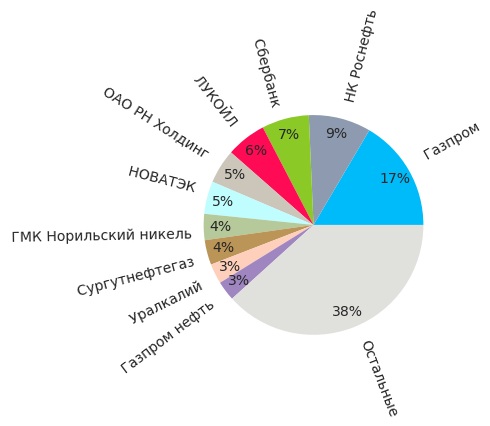

In [115]:
fig, ax1 = plt.subplots(figsize=(10, 6), tight_layout=True)

ax1.pie(x=corps_weigths_2011,
        labels=labels_2011,
        rotatelabels=True,
        colors=['#00bbf9', '#8e9aaf', '#8ac926', '#ff0a54', '#ccc5b9', '#c0fdff', '#b5c99a', '#bb9457', '#fed0bb', '#9f86c0', '#e0e1dd'],
        autopct='{:.0f}%'.format,
        pctdistance=0.85,
        textprops={'fontsize' : 14})

fig.savefig(picts_loc + 'pie1.png', dpi=180)

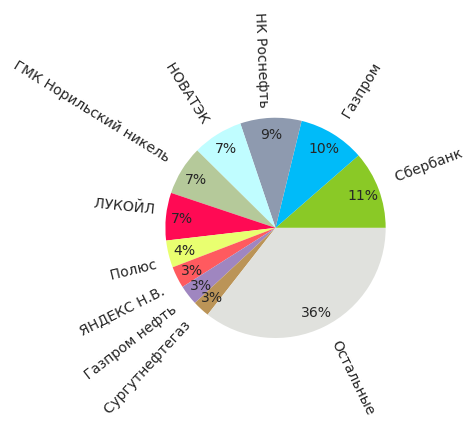

In [116]:
fig, ax2 = plt.subplots(figsize=(10, 6), tight_layout=True)

ax2.pie(x=corps_weigths,
        labels=labels,
        rotatelabels=True,
        colors=['#8ac926', '#00bbf9', '#8e9aaf', '#c0fdff', '#b5c99a', '#ff0a54', '#e9ff70', '#ff5a5f', '#9f86c0', '#bb9457', '#e0e1dd'],
        autopct='{:.0f}%'.format,
        pctdistance=0.85,
        textprops={'fontsize' : 14})

fig.savefig(picts_loc + 'pie2.png', dpi=180)

In [117]:
turnover = pd.Series([19.678, 11.647, 8.707, 10.283, 9.398, 9.277, 9.185, 10.830, 12.443, 23.905],
                    index=range(2011, 2021))

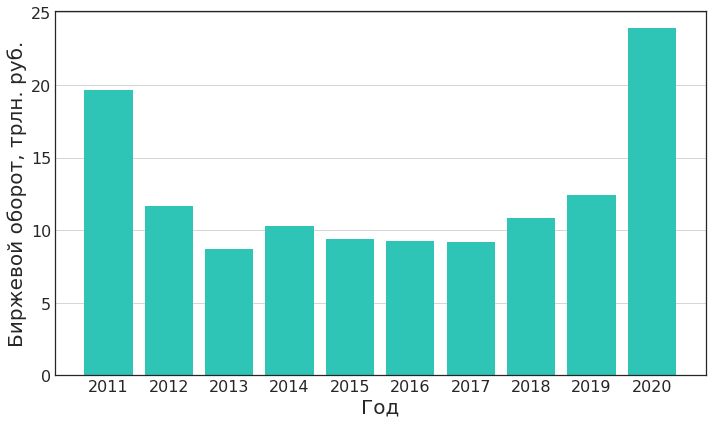

In [140]:
fig, ax = plt.subplots(figsize=(10, 6), tight_layout=True)

plt.bar(turnover.index, turnover, color='#2ec4b6')
plt.xticks(turnover.index, fontsize=16)
plt.xlabel('Год', fontsize=20)
plt.yticks(fontsize=16)
plt.ylabel('Биржевой оборот, трлн. руб.', fontsize=20)
plt.grid(axis='y')

fig.savefig(picts_loc + 'turn.png', dpi=180)

In [143]:
turnover[2012] / turnover[2011] * 100 - 100

-40.81207439780465

In [144]:
turnover[2020] / turnover[2019] * 100 - 100

92.11604918428034

In [145]:
turnover

2011    19.678
2012    11.647
2013     8.707
2014    10.283
2015     9.398
2016     9.277
2017     9.185
2018    10.830
2019    12.443
2020    23.905
dtype: float64

In [149]:
df['cap_2020_4'].dropna().index.values

array(['ABRD', 'ACKO', 'AFKS', 'AFLT', 'AKRN', 'ALBK', 'ALNU', 'ALRS',
       'AMEZ', 'APTK', 'AQUA', 'ARSA', 'ASSB', 'AVAN', 'BANE', 'BANEP',
       'BELU', 'BISVP', 'BLNG', 'BRZL', 'BSPB', 'CBOM', 'CHEP', 'CHGZ',
       'CHKZ', 'CHMF', 'CHMK', 'CNTL', 'CNTLP', 'DASB', 'DIOD', 'DSKY',
       'DVEC', 'DZRD', 'DZRDP', 'EELT', 'ELTZ', 'ENPG', 'ENRU', 'FEES',
       'FESH', 'FLOT', 'GAZA', 'GAZAP', 'GAZP', 'GCHE', 'GEMA', 'GMKN',
       'GRNT', 'GTLC', 'GTRK', 'HALS', 'HIMCP', 'HYDR', 'IDVP', 'IGST',
       'IGSTP', 'INGR', 'IRAO', 'IRGZ', 'IRKT', 'ISKJ', 'JNOS', 'JNOSP',
       'KAZT', 'KAZTP', 'KBSB', 'KBTK', 'KCHE', 'KCHEP', 'KGKC', 'KGKCP',
       'KLSB', 'KMAZ', 'KMEZ', 'KOGK', 'KRKN', 'KRKNP', 'KRKOP', 'KROT',
       'KROTP', 'KRSB', 'KRSBP', 'KTSB', 'KTSBP', 'KUBE', 'KUZB', 'KZOS',
       'KZOSP', 'LIFE', 'LKOH', 'LNZL', 'LNZLP', 'LPSB', 'LSNG', 'LSNGP',
       'LSRG', 'LVHK', 'MAGE', 'MAGEP', 'MAGN', 'MERF', 'MFGS', 'MFGSP',
       'MGNT', 'MGNZ', 'MGTS', 'MGTSP', 'MISB', 'MISBP',